# **🚀NASA Turbofan Jet Engine**

#### ✅ **Información del Dataset**  - *Dataset Information*:

 ##### ⚪ **Descripción**  - *Description*:

El mantenimiento predictivo y la gestión de salud (PHM, por sus siglas en inglés) .............

*Prognostics and health management is an important topic in industry for predicting state of assets to avoid downtime and failures. This data set is the Kaggle version of the very well known public data set for asset degradation modeling from NASA. It includes Run-to-Failure simulated data from turbo fan jet engines.*

*Engine degradation simulation was carried out using C-MAPSS. Four different were sets simulated under different combinations of operational conditions and fault modes. Records several sensor channels to characterize fault evolution. The data set was provided by the Prognostics CoE at NASA Ames..............*


#### ✅ **Importación de librerias**  - *Importing libraries*:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### ✅ **Carga de datos**  - *Data loading*:

In [3]:
# Definir los nombres de las columnas - Define the columns names
column_names = ['unit_number', 'time_in_cycles', 
                'operational_setting_1', 'operational_setting_2', 'operational_setting_3'] + \
               [f'sensor_measurement_{i}' for i in range(1, 22)]

# Cargar el archivo - Load the file
df_train = pd.read_csv('C:/Users/Fer/Desktop/Proyectos DS en ingenieria/NASA Turbofan Jet Engine/CMaps/train_FD001.txt', sep=' ', header=None)
df_train.drop(columns=[26, 27], inplace=True)  # El último sensor es el número 21 - The last sensor is the number 21. 
df_train.columns = column_names

#### ✅ **Análisis inicial**  - *Initial analysis*:

 ##### ⚪ **Primeras filas del dataset**  - *First rows of the dataset*:

In [4]:
# Observar las primeras filas del dataset - Look at the first rows of the dataset 
df_train.head(10)

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,522.32,2388.03,8132.32,8.3974,0.03,392,2388,100.0,39.10,23.3774
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,522.47,2388.03,8131.07,8.4076,0.03,391,2388,100.0,38.97,23.3106
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,521.79,2388.05,8125.69,8.3728,0.03,392,2388,100.0,39.05,23.4066
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,521.79,2388.06,8129.38,8.4286,0.03,393,2388,100.0,38.95,23.4694


 ##### ⚪ **Categorías**  - *Categories*:

In [5]:
#Ver las categorías del dataset - Look at the dataset categories
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            20631 non-null  int64  
 1   time_in_cycles         20631 non-null  int64  
 2   operational_setting_1  20631 non-null  float64
 3   operational_setting_2  20631 non-null  float64
 4   operational_setting_3  20631 non-null  float64
 5   sensor_measurement_1   20631 non-null  float64
 6   sensor_measurement_2   20631 non-null  float64
 7   sensor_measurement_3   20631 non-null  float64
 8   sensor_measurement_4   20631 non-null  float64
 9   sensor_measurement_5   20631 non-null  float64
 10  sensor_measurement_6   20631 non-null  float64
 11  sensor_measurement_7   20631 non-null  float64
 12  sensor_measurement_8   20631 non-null  float64
 13  sensor_measurement_9   20631 non-null  float64
 14  sensor_measurement_10  20631 non-null  float64
 15  se

 ##### ⚪ **Valores únicos**  - *Unique values*:

In [6]:
# Contar valores únicos por columna - Count unique values per column
valores_repetidos = df_train.nunique()
print(valores_repetidos)

unit_number               100
time_in_cycles            362
operational_setting_1     158
operational_setting_2      13
operational_setting_3       1
sensor_measurement_1        1
sensor_measurement_2      310
sensor_measurement_3     3012
sensor_measurement_4     4051
sensor_measurement_5        1
sensor_measurement_6        2
sensor_measurement_7      513
sensor_measurement_8       53
sensor_measurement_9     6403
sensor_measurement_10       1
sensor_measurement_11     159
sensor_measurement_12     427
sensor_measurement_13      56
sensor_measurement_14    6078
sensor_measurement_15    1918
sensor_measurement_16       1
sensor_measurement_17      13
sensor_measurement_18       1
sensor_measurement_19       1
sensor_measurement_20     120
sensor_measurement_21    4745
dtype: int64


Algunas columnas no aportan información relevante al modelo, ya que poseen un único valor en todas sus filas. 

*Some columns do not provide relevant information in the model, because they have a unique value in all rows.*


In [7]:
# Eliminar columnas sin variabilidad - Eliminate columns without variability
columnas_sin_variabilidad = [
    'operational_setting_3',
    'sensor_measurement_1',
    'sensor_measurement_5',
    'sensor_measurement_10',
    'sensor_measurement_16',
    'sensor_measurement_18',
    'sensor_measurement_19'
]
df_train.drop(columns=columnas_sin_variabilidad, inplace=True)

 ##### ⚪ **Valores nulos**  - *Null values*:

In [8]:
#Observar que no existen valores nulos en el dataset - Note that null values do not exist in the dataset
df_train.isnull().sum() 

unit_number              0
time_in_cycles           0
operational_setting_1    0
operational_setting_2    0
sensor_measurement_2     0
sensor_measurement_3     0
sensor_measurement_4     0
sensor_measurement_6     0
sensor_measurement_7     0
sensor_measurement_8     0
sensor_measurement_9     0
sensor_measurement_11    0
sensor_measurement_12    0
sensor_measurement_13    0
sensor_measurement_14    0
sensor_measurement_15    0
sensor_measurement_17    0
sensor_measurement_20    0
sensor_measurement_21    0
dtype: int64

 ##### ⚪ **Estadísticas descriptivas**  - *Descriptive estadistics*:

In [9]:
# Estadísticas descriptivas - Descriptive estadistics
df_train.describe()

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_17,sensor_measurement_20,sensor_measurement_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,642.680934,1590.523119,1408.933782,21.609803,553.367711,2388.096652,9065.242941,47.541168,521.413470,2388.096152,8143.752722,8.442146,393.210654,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.500053,6.131150,9.000605,0.001389,0.885092,0.070985,22.082880,0.267087,0.737553,0.071919,19.076176,0.037505,1.548763,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,641.210000,1571.040000,1382.250000,21.600000,549.850000,2387.900000,9021.730000,46.850000,518.690000,2387.880000,8099.940000,8.324900,388.000000,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,642.325000,1586.260000,1402.360000,21.610000,552.810000,2388.050000,9053.100000,47.350000,520.960000,2388.040000,8133.245000,8.414900,392.000000,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,642.640000,1590.100000,1408.040000,21.610000,553.440000,2388.090000,9060.660000,47.510000,521.480000,2388.090000,8140.540000,8.438900,393.000000,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,643.000000,1594.380000,1414.555000,21.610000,554.010000,2388.140000,9069.420000,47.700000,521.950000,2388.140000,8148.310000,8.465600,394.000000,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,644.530000,1616.910000,1441.490000,21.610000,556.060000,2388.560000,9244.590000,48.530000,523.380000,2388.560000,8293.720000,8.584800,400.000000,39.430000,23.618400


#### ✅ **Análisis de Datos Exploratorio**  - *Exploratory Data Analysis*:

 ##### ⚪ **Gráficos de los sensores**  - *Sensors Plots*:

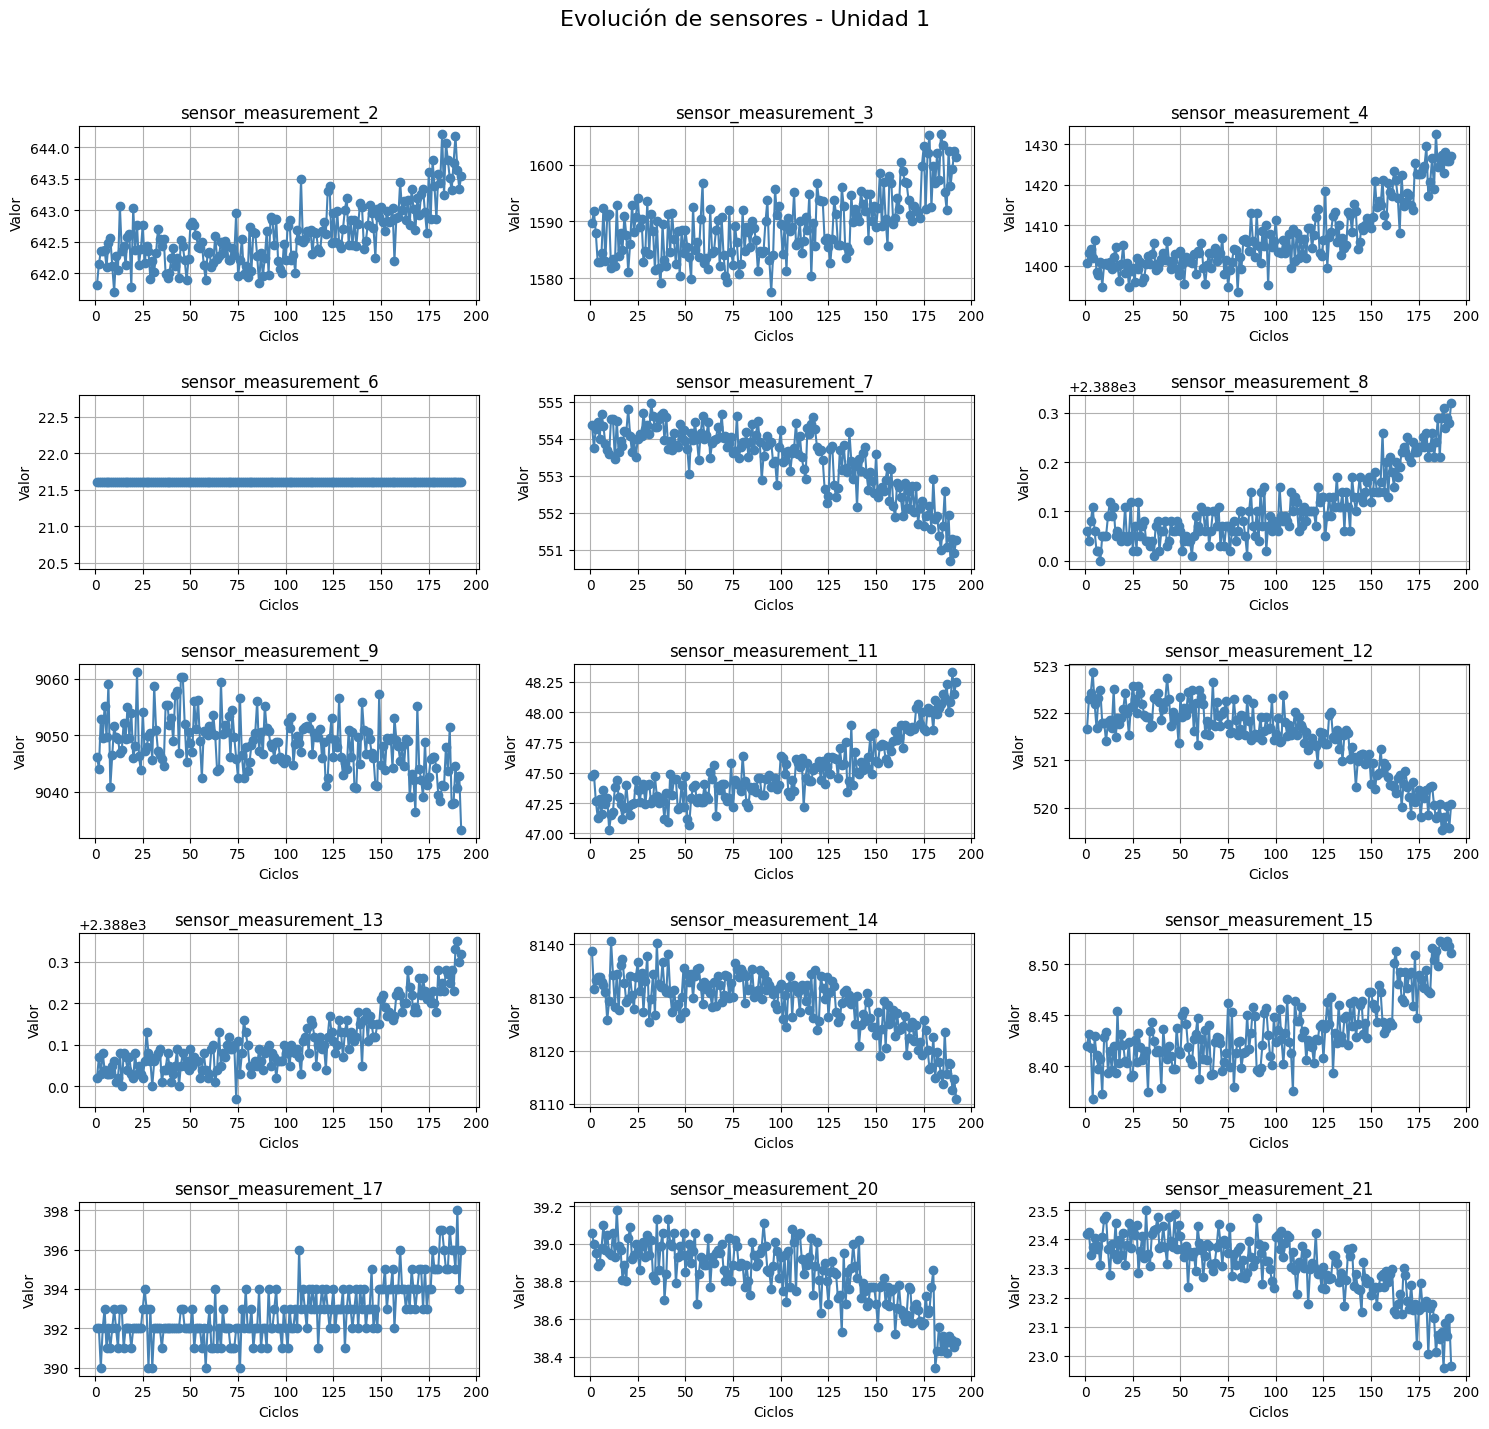

In [10]:
# Filtrar para la únidad 1 como ejemplo - Filter for unit 1 as an example 
unidad = 1
df_unidad = df_train[df_train['unit_number'] == unidad]

# Seleccionar las columnas de sensores (excluyendo las eliminadas previamente) - Select the sensors columns (excluding those previously deleted) 
sensores_utiles = [col for col in df_train.columns if col.startswith('sensor_measurement_')]

# Cantidad de sensores a graficar - Number of sensors to be plotted 
n = len(sensores_utiles)
n_cols = 3  # Cantidad de columnas de gráficos - Number of columns in the graphic 
n_rows = (n // n_cols) + int(n % n_cols != 0)

# Crear subplots - Create subplots 
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axs = axs.flatten()

# Graficar cada sensor - Plot each sensor
for i, sensor in enumerate(sensores_utiles):
    axs[i].plot(df_unidad['time_in_cycles'], df_unidad[sensor], marker='o', linestyle='-', color = 'steelblue')
    axs[i].set_title(sensor)
    axs[i].set_xlabel('Ciclos')
    axs[i].set_ylabel('Valor')
    axs[i].grid(True)

fig.suptitle(f'Evolución de sensores - Unidad {unidad}', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


 ##### ⚪ **Gráficos de las Variables Operativas**  - *Operational Setting Plots*:

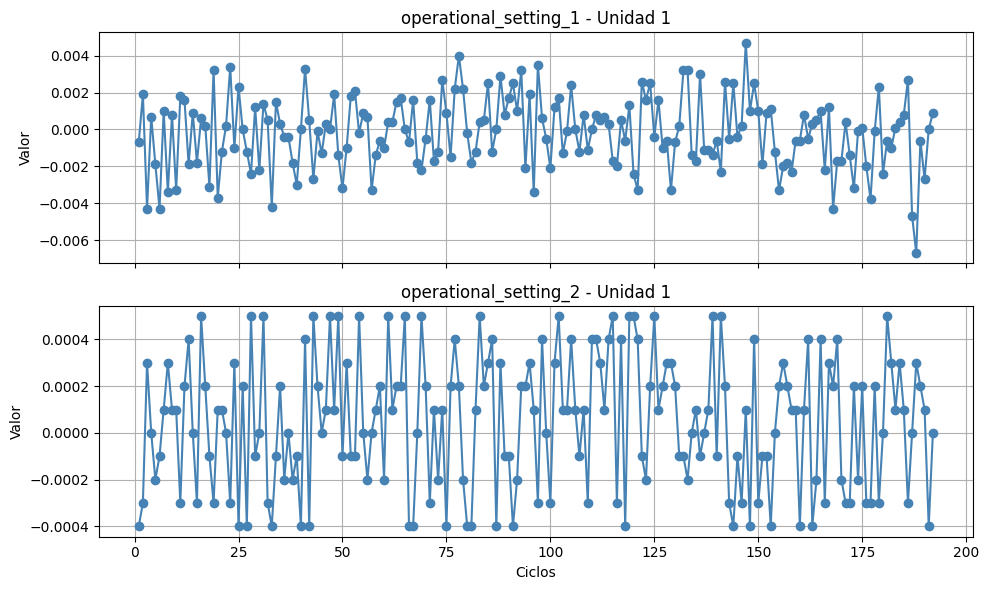

In [11]:
# Filtrar para la únidad 1 como ejemplo - Filter for unit 1 as an example
unidad = 1
df_unidad = df_train[df_train['unit_number'] == unidad]

# Variables operativas - Operational settings
variables_operativas = ['operational_setting_1', 'operational_setting_2']

# Cantidad de variables - Number of variables
n = len(variables_operativas)

# Crear subplots - Create subplots
fig, axs = plt.subplots(n, 1, figsize=(10, 3 * n), sharex=True)

# Graficar cada variable operativa - Plot each operational setting
for i, var in enumerate(variables_operativas):
    axs[i].plot(df_unidad['time_in_cycles'], df_unidad[var], marker='o', linestyle='-', color = 'steelblue')
    axs[i].set_title(f'{var} - Unidad {unidad}')
    axs[i].set_ylabel('Valor')
    axs[i].grid(True)

axs[-1].set_xlabel('Ciclos')

plt.tight_layout()
plt.show()


 ##### ⚪ **Histogramas de variables numéricas**  - *Histograms of numerical variables*:

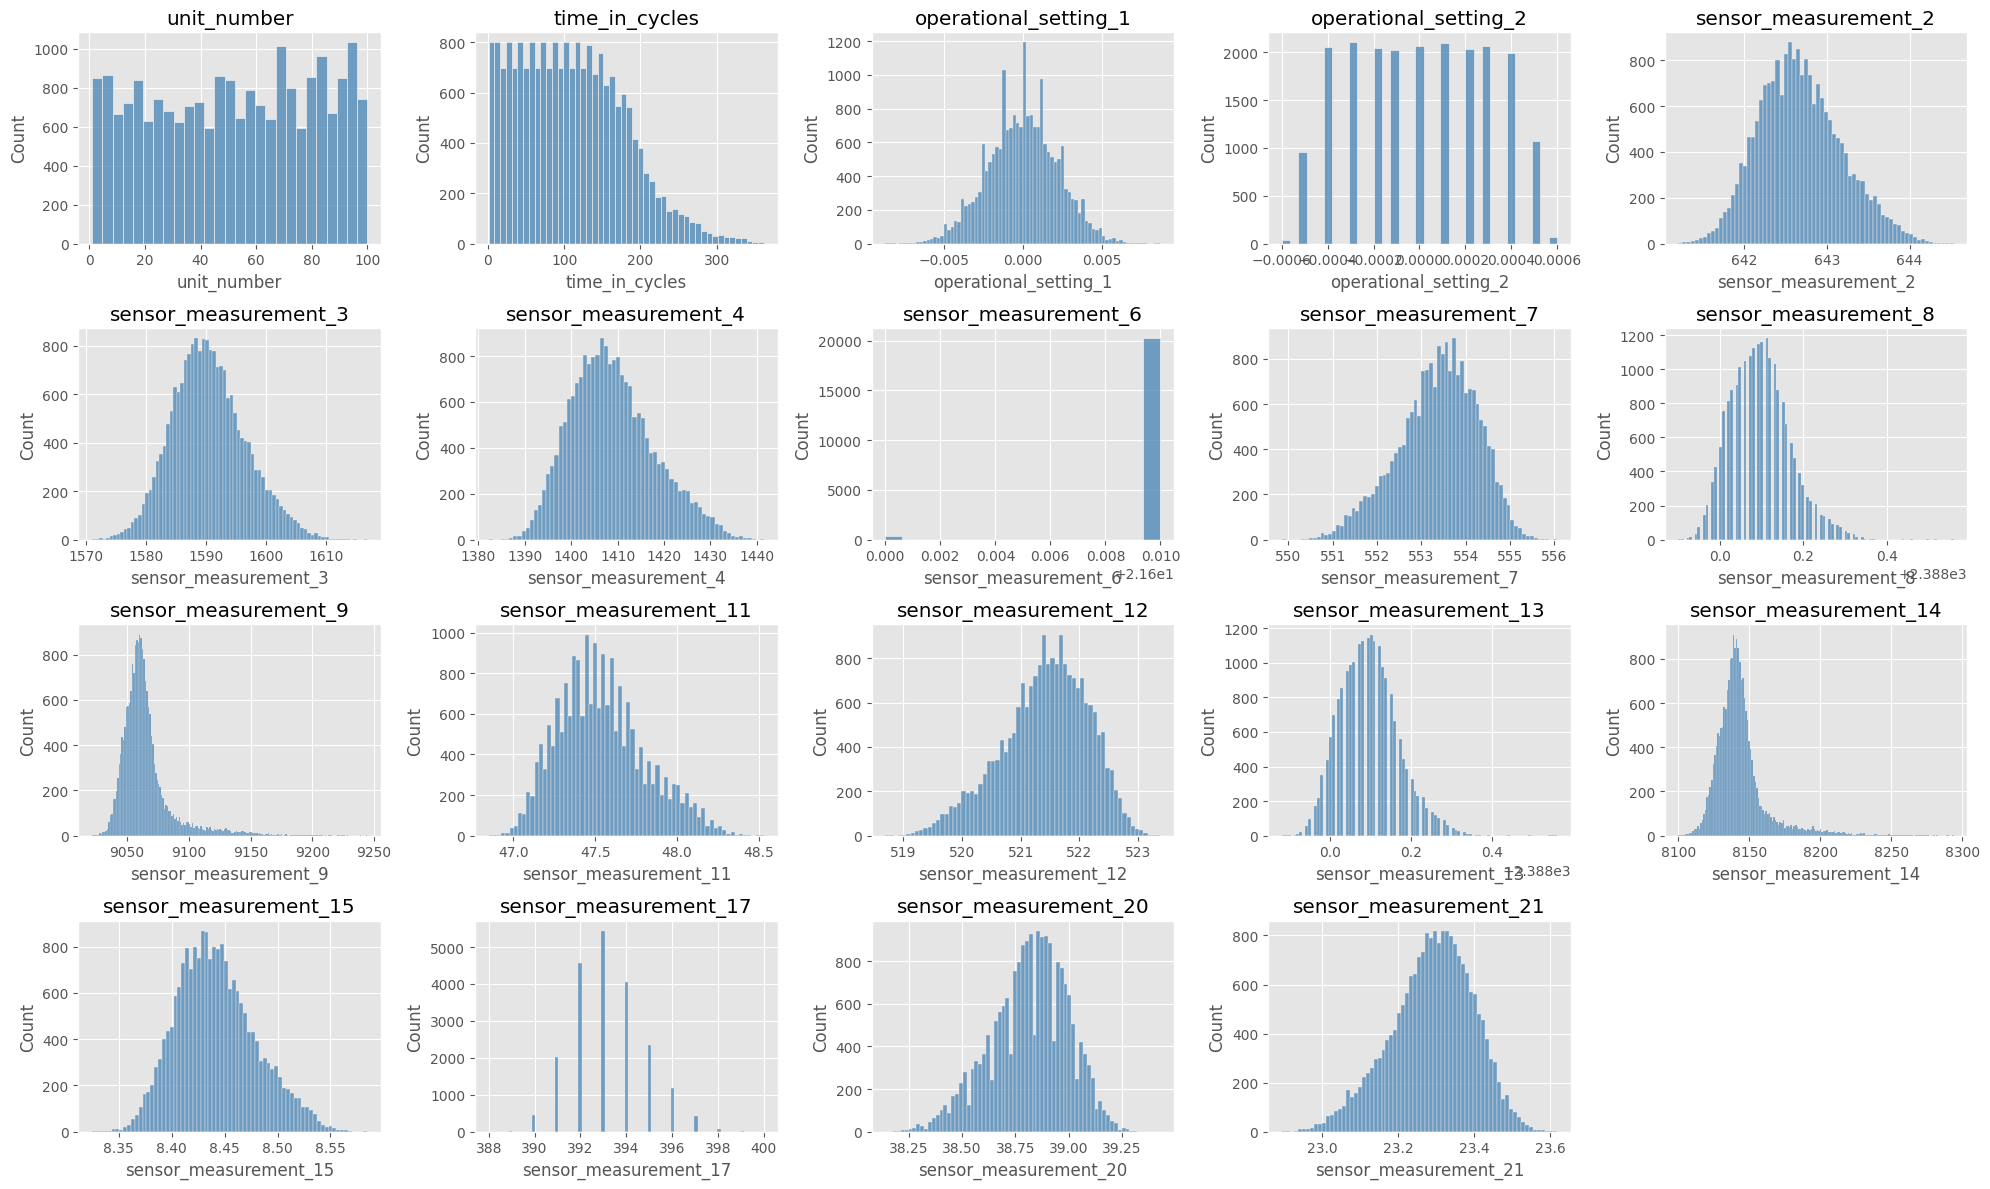

In [12]:
# Ignorar alertas - Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Definir estulo de gráfico - Define plot style 
plt.style.use('ggplot')

# Seleccionar columnas numéricas - Select the number of numeric columns
numeric_columns = df_train.select_dtypes(include=np.number).columns.tolist()

# Configurar el tamaño y distribución de subplots - Configure the size and the subplots distribution 
n = len(numeric_columns)
n_cols = 5
n_rows = (n // n_cols) + int(n % n_cols != 0)

plt.figure(figsize=(n_cols * 4, n_rows * 3))

for i, variable in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df_train[variable], kde=False, color='steelblue')
    plt.title(variable)
    plt.tight_layout()

plt.show()

 ##### ⚪ **Matriz de correlación**  - *Correlation matrix*:

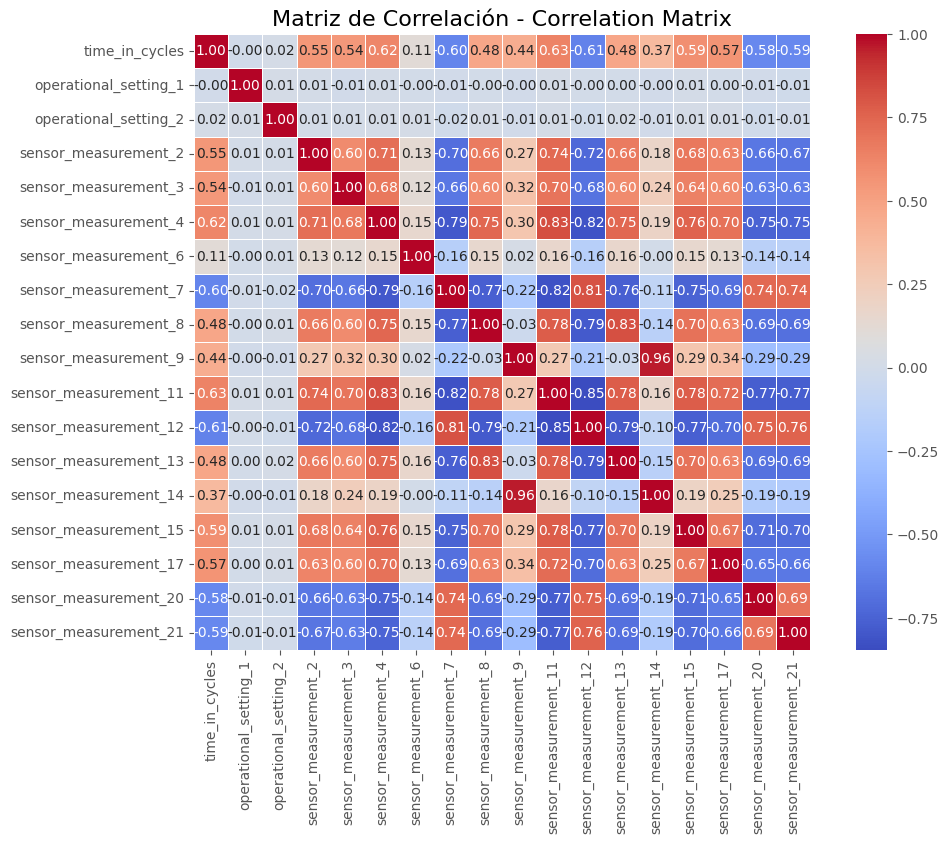

In [13]:
# Seleccionar las columnas numéricas, excluyendo 'unit_number' - Select the numeric columns, excluding 'unit_number'
df_numeric = df_train.drop(columns=['unit_number']).select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación - Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Graficar un mapa de calor - Plot a heat map
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True, cbar=True)
plt.title('Matriz de Correlación - Correlation Matrix', fontsize=16)
plt.show()


Analizando la matriz de correlación y las estadísticas descriptivas, se determina que las columnas operational_setting_1, operational_setting_2, sensor_measurement_6, sensor_measurement_9 y sensor_measurement_14, poseen muy baja correlación con otras variables y baja variabilidad en sus valores, por ende no contribuyen al análisis predictivo y serán eliminadas del modelo. 

*Analyzing the correlation matrix and descriptive statistics, it is determined that the columns operational_setting_1, operational_setting_2, sensor_measurement_6, sensor_measurement_9 and sensor_measurement_14 have very low correlation with other variables and low variability in their values, therefore they do not contribute to the predictive analysis and will be eliminated from the model.*

In [14]:
# Eliminar columnas con baja correlación y variabilidad - Eliminate columns with low correlation and low variability
df_train.drop(columns=[
    'operational_setting_1',
    'operational_setting_2',
    'sensor_measurement_6',
    'sensor_measurement_9',
    'sensor_measurement_14',
], inplace=True)

 ##### ⚪ **Matriz de correlación final**  - *Final correlation matrix*:

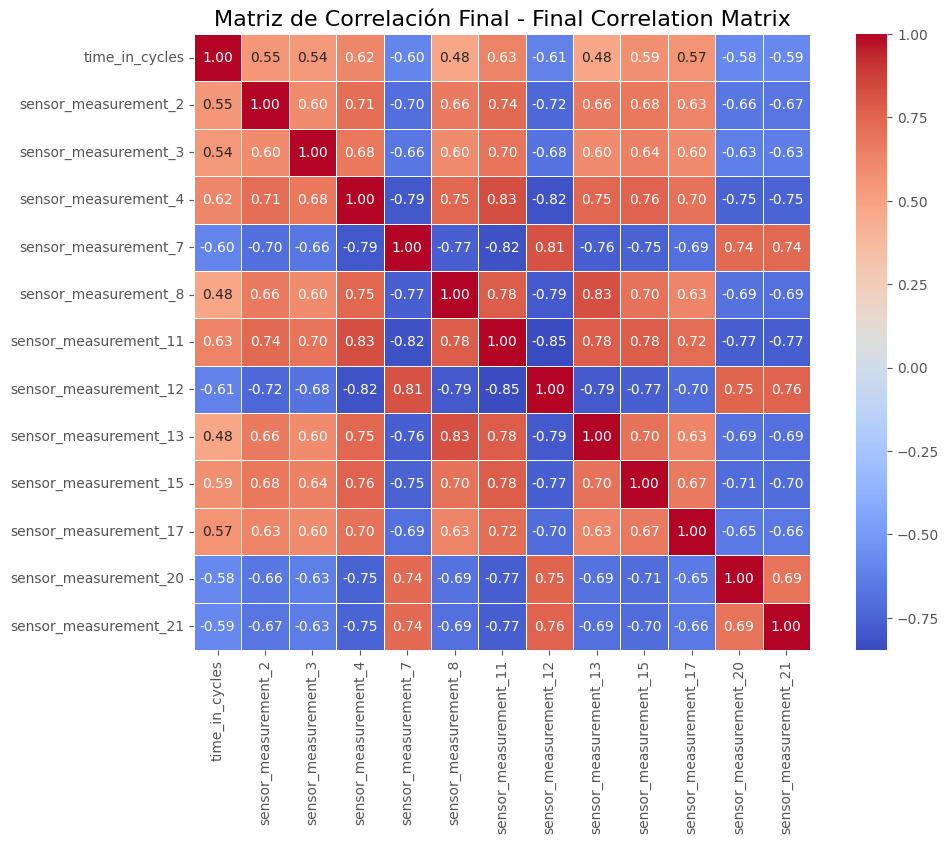

In [15]:
# Seleccionar las columnas numéricas, excluyendo 'unit_number' - Select the numeric columns, excluding 'unit_number'
df_numeric = df_train.drop(columns=['unit_number']).select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación - Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Graficar un mapa de calor - Plot a heat map
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True, cbar=True)
plt.title('Matriz de Correlación Final - Final Correlation Matrix', fontsize=16)
plt.show()


 ##### ⚪ **Primeras filas del dataset corregido**  - *First rows of the corrected dataset*:

In [16]:
# Observar las primeras filas del dataset corregido - Look at the first rows of the corrected dataset 
df_train.head(10)

,unit_number,time_in_cycles,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_7,sensor_measurement_8,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_15,sensor_measurement_17,sensor_measurement_20,sensor_measurement_21
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044
5,1,6,642.10,1584.47,1398.37,554.67,2388.02,47.16,521.68,2388.03,8.4108,391,38.98,23.3669
6,1,7,642.48,1592.32,1397.77,554.34,2388.02,47.36,522.32,2388.03,8.3974,392,39.10,23.3774
7,1,8,642.56,1582.96,1400.97,553.85,2388.00,47.24,522.47,2388.03,8.4076,391,38.97,23.3106
8,1,9,642.12,1590.98,1394.80,553.69,2388.05,47.29,521.79,2388.05,8.3728,392,39.05,23.4066
9,1,10,641.71,1591.24,1400.46,553.59,2388.05,47.03,521.79,2388.06,8.4286,393,38.95,23.4694


#### ✅ **Modelo de Aprendizaje Supervisado**  - *Supervised Learning Model*:

In [17]:
#  Cargar el archivo con los RUL reales (uno por unidad)
rul_real = pd.read_csv("C:/Users/Fer/Desktop/Proyectos DS en ingenieria/NASA Turbofan Jet Engine/CMaps/RUL_FD001.txt", header=None, names=['RUL_true'])

# Asignar unit_number del 1 al 100 (una unidad por fila en rul_real)
rul_real['unit_number'] = range(1, len(rul_real)+1)

# Eliminar columna RUL_true si ya existe en df_train
if 'RUL_true' in df_train.columns:
    df_train = df_train.drop(columns=['RUL_true'])

# Hacer merge en df_train para que cada fila tenga su RUL_true correspondiente
df_train = df_train.merge(rul_real, on='unit_number', how='left')

# Verificar
df_train.head()


,unit_number,time_in_cycles,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_7,sensor_measurement_8,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_15,sensor_measurement_17,sensor_measurement_20,sensor_measurement_21,RUL_true
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,112
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,112
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,112
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,112
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,112


In [18]:
# Eliminar columna 'max_cycle' si ya existe
if 'max_cycle' in df_train.columns:
    df_train.drop(columns=['max_cycle'], inplace=True)

# 1. Para cada unidad, obtener su ciclo máximo
max_cycles = df_train.groupby('unit_number')['time_in_cycles'].max().reset_index()
max_cycles.columns = ['unit_number', 'max_cycle']

# 2. Merge con df_train
df_train = df_train.merge(max_cycles, on='unit_number', how='left')

# 3. Calcular RUL para cada fila
df_train['RUL'] = df_train['RUL_true'] + (df_train['max_cycle'] - df_train['time_in_cycles'])

# Verificar
df_train.head()


,unit_number,time_in_cycles,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_7,sensor_measurement_8,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_15,sensor_measurement_17,sensor_measurement_20,sensor_measurement_21,RUL_true,max_cycle,RUL
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,112,192,303
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,112,192,302
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,112,192,301
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,112,192,300
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,112,192,299


 ##### ⚪ **1. Regresión Lineal**  - *Linear Regression*:

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Seleccionamos las características (features) y la variable objetivo (RUL)
X = df_train.drop(columns=['unit_number', 'time_in_cycles', 'RUL_true', 'RUL'])  # Características
y = df_train['RUL']  # Variable objetivo (RUL)

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo con MAE y RMSE
mae_lr = mean_absolute_error(y_test, y_pred)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))
r2_lr = r2_score(y_test, y_pred)

print(f"MAE - Linear Regression:  {mae_lr:.2f}")
print(f"RMSE - Linear Regression: {rmse_lr:.2f}")
print(f"R² - Linear Regression:   {r2_lr:.2f}")

MAE - Linear Regression:  44.26
RMSE - Linear Regression: 54.24
R² - Linear Regression:   0.53


 ##### ⚪ **2. K- Vecinos Cercanos**  - *K-Nearest Neighbors (KNN)*:

In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Dividir los datos
X = df_train.drop(columns=['unit_number', 'time_in_cycles', 'RUL_true', 'RUL'])  
y = df_train['RUL']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de K-Nearest Neighbors Regressor
model = KNeighborsRegressor(n_neighbors=9) # Definir el número de vecinos cercanos

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mae_kkn = mean_absolute_error(y_test, y_pred)
rmse_kkn = np.sqrt(mean_squared_error(y_test, y_pred))
r2_kkn = r2_score(y_test, y_pred)

print(f"MAE - KKN:  {mae_kkn:.2f}")
print(f"RMSE - KKN: {rmse_kkn:.2f}")
print(f"R² - KKN:   {r2_kkn:.2f}")

MAE - KKN:  38.61
RMSE - KKN: 48.33
R² - KKN:   0.63


 ##### ⚪ **3. Árboles de decisión**  - *Decision Tree Regressor*:

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  
from sklearn.model_selection import train_test_split

# Seleccionamos las características (features) y la variable objetivo (RUL)
X = df_train.drop(columns=['unit_number', 'time_in_cycles', 'RUL_true', 'RUL'])  # Características
y = df_train['RUL']  # Variable objetivo (RUL)

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Árbol de Decisión para regresión
model = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo con MAE y RMSE
mae_dtr = mean_absolute_error(y_test, y_pred)
rmse_dtr = np.sqrt(mean_squared_error(y_test, y_pred))
r2_dtr = r2_score(y_test, y_pred)

print(f"MAE - Decision Tree Regressor:  {mae_dtr:.2f}")
print(f"RMSE - Decision Tree Regressor: {rmse_dtr:.2f}")
print(f"R² - Decision Tree Regressor:   {r2_dtr:.2f}")

MAE - Decision Tree Regressor:  44.95
RMSE - Decision Tree Regressor: 59.85
R² - Decision Tree Regressor:   0.43


 ##### ⚪ **4. Árboles de decisión con ajustes de hiperparámetros**  - *Decision Tree Regressor with Hyperparameter Tuning*:

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

model = DecisionTreeRegressor(random_state=42)
grid = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

print("Mejor combinación:", grid.best_params_)

Mejor combinación: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20}


In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Seleccionamos las características (features) y la variable objetivo (RUL)
X = df_train.drop(columns=['unit_number', 'time_in_cycles', 'RUL_true', 'RUL'])  # Características
y = df_train['RUL']  # Variable objetivo (RUL)

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo con los hiperparámetros que elijas
dt = DecisionTreeRegressor(
    max_depth=10,                # Ejemplo de profundidad máxima del árbol
    min_samples_split=20,        # Ejemplo de mínimo de muestras para dividir un nodo
    min_samples_leaf=5,          # Ejemplo de mínimo de muestras por hoja
    random_state=42
)

# Entrenar el modelo con los datos de entrenamiento
dt.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred = dt.predict(X_test)

# Calcular las métricas
mae_dth = mean_absolute_error(y_test, y_pred)
mse_dth = mean_squared_error(y_test, y_pred)  # Error cuadrático medio (MSE)
rmse_dth = mse_dth ** 0.5  # Raíz cuadrada del MSE
r2_dth = r2_score(y_test, y_pred)

# Imprimir las métricas
print(f"MAE - Decision Tree w/Hyperparameters:  {mae_dth:.2f}")
print(f"RMSE - Decision Tree w/Hyperparameters: {rmse_dth:.2f}")
print(f"R² - Decision Tree w/Hyperparameters:   {r2_dth:.2f}")

MAE - Decision Tree w/Hyperparameters:  39.49
RMSE - Decision Tree w/Hyperparameters: 49.95
R² - Decision Tree w/Hyperparameters:   0.60


 ##### ⚪ **5. Bosque aleatorio**  - *Random Forest*:

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Dividir los datos
X = df_train.drop(columns=['unit_number', 'time_in_cycles', 'RUL_true', 'RUL'])  
y = df_train['RUL']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mae_rf = mean_absolute_error(y_test, y_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
r2_rf = r2_score(y_test, y_pred)

print(f"Random Forest - MAE:  {mae_rf:.2f}")
print(f"Random Forest - RMSE: {rmse_rf:.2f}")
print(f"Random Forest - R²:   {r2_rf:.2f}")

Random Forest - MAE:  32.93
Random Forest - RMSE: 41.65
Random Forest - R²:   0.73


 ##### ⚪ **6. Aumento de gradiente**  - *Gradient Boosting*:

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Dividir los datos
X = df_train.drop(columns=['unit_number', 'time_in_cycles', 'RUL_true', 'RUL'])  
y = df_train['RUL']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Gradient Boosting Regressor
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
model_gb.fit(X_train, y_train)

# Hacer predicciones
y_pred_gb = model_gb.predict(X_test)

# Evaluar el modelo
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - MAE:  {mae_gb:.2f}")
print(f"Gradient Boosting - RMSE: {rmse_gb:.2f}")
print(f"Gradient Boosting - R²:   {r2_gb:.2f}")

Gradient Boosting - MAE:  35.00
Gradient Boosting - RMSE: 43.53
Gradient Boosting - R²:   0.70


 ##### ⚪ **7. XCBoost**  - *XCBoost*:

In [28]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Dividir los datos
X = df_train.drop(columns=['unit_number', 'time_in_cycles', 'RUL_true', 'RUL'])  
y = df_train['RUL']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de XGBoost Regressor
model_xgb = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
model_xgb.fit(X_train, y_train)

# Hacer predicciones
y_pred_xgb = model_xgb.predict(X_test)

# Evaluar el modelo
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MAE:  {mae_xgb:.2f}")
print(f"XGBoost - RMSE: {rmse_xgb:.2f}")
print(f"XGBoost - R²:   {r2_xgb:.2f}")

XGBoost - MAE:  30.01
XGBoost - RMSE: 38.98
XGBoost - R²:   0.76


 ##### ⚪ **Comparación de resultados**  - *Results comparision*:

In [29]:
# Crear una lista vacía para acumular los resultados
resultados = []

# Linear Regression
resultados.append({
    'Modelo': 'Linear Regression',
    'MAE': mae_lr,
    'RMSE': rmse_lr,
    'R²': r2_lr
})

# KKN
resultados.append({
    'Modelo': 'KKN',
    'MAE': mae_kkn,
    'RMSE': rmse_kkn,
    'R²': r2_kkn
})

# Decision Tree Regression
resultados.append({
    'Modelo': 'Decision Tree Regression',
    'MAE': mae_dtr,
    'RMSE': rmse_dtr,
    'R²': r2_dtr
})

# Decision Tree w/Hyperparameters
resultados.append({
    'Modelo': 'Decision Tree w/Hyperparameters',
    'MAE': mae_dth,
    'RMSE': rmse_dth,
    'R²': r2_dth
})

# Random Forest
resultados.append({
    'Modelo': 'Random Forest',
    'MAE': mae_rf,
    'RMSE': rmse_rf,
    'R²': r2_rf
})

# Gradient Boosting
resultados.append({
    'Modelo': 'Gradient Boosting',
    'MAE': mae_gb,
    'RMSE': rmse_gb,
    'R²': r2_gb
})

# XGBoost Optimizado
resultados.append({
    'Modelo': 'XGBoost',
    'MAE': mae_xgb,
    'RMSE': rmse_xgb,
    'R²': r2_xgb
})

# Crear el DataFrame final
df_resultados = pd.DataFrame(resultados)
df_resultados[['MAE', 'RMSE', 'R²']] = df_resultados[['MAE', 'RMSE', 'R²']].round(2)

# Mostrar tabla de resumen
print("\nResumen de métricas:\n")
print(df_resultados.to_string(index=False))


Resumen de métricas:

                         Modelo   MAE  RMSE   R²
              Linear Regression 44.26 54.24 0.53
                            KKN 38.61 48.33 0.63
       Decision Tree Regression 44.95 59.85 0.43
Decision Tree w/Hyperparameters 39.49 49.95 0.60
                  Random Forest 32.93 41.65 0.73
              Gradient Boosting 35.00 43.53 0.70
                        XGBoost 30.01 38.98 0.76


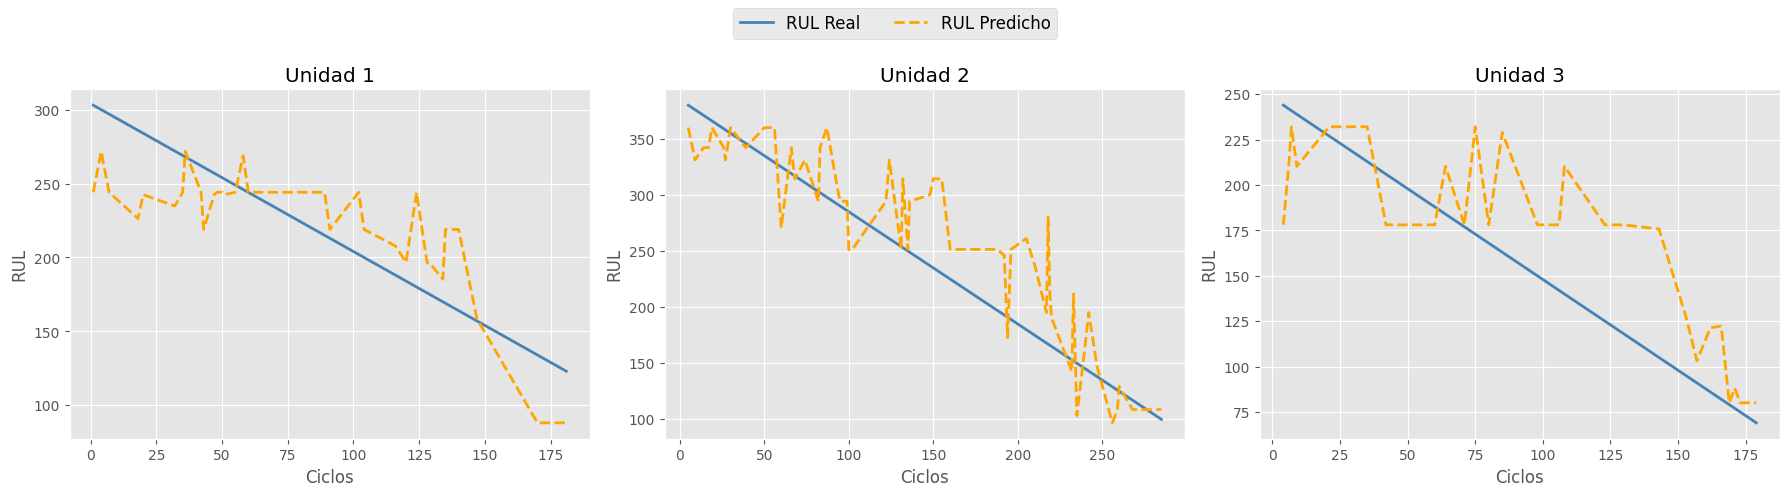

In [ ]:
import math

# Asegurarse de que 'unit_number' y 'time_in_cycles' estén en X_test
X_test = X_test.assign(unit_number=df_train.loc[X_test.index, 'unit_number'])
X_test = X_test.assign(time_in_cycles=df_train.loc[X_test.index, 'time_in_cycles'])

# Parámetros personalizables
n_unidades = 3              # Cantidad de unidades a graficar
cols = 3                    # Número de columnas en la figura
rows = math.ceil(n_unidades / cols)  # Número de filas necesario

# Crear figura
fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
axes = axes.flatten()  # Para indexar fácilmente con un solo índice

# Lista de unidades a graficar
units = range(1, n_unidades + 1)

for idx, unit in enumerate(units):
    ax = axes[idx]

    unit_test = X_test[X_test['unit_number'] == unit]
    unit_y_test = y_test[df_train.loc[X_test.index, 'unit_number'] == unit]
    unit_y_pred = y_pred[df_train.loc[X_test.index, 'unit_number'] == unit]
    unit_time_in_cycles = unit_test['time_in_cycles']
    
    if len(unit_test) > 0:
        sorted_indices = unit_time_in_cycles.argsort()
        unit_y_test_sorted = unit_y_test.iloc[sorted_indices]
        unit_y_pred_sorted = unit_y_pred[sorted_indices]
        unit_time_in_cycles_sorted = unit_time_in_cycles.iloc[sorted_indices]

        ax.plot(unit_time_in_cycles_sorted, unit_y_test_sorted.values, label='RUL Real', color='steelblue', linewidth=2)
        ax.plot(unit_time_in_cycles_sorted, unit_y_pred_sorted, label='RUL Predicho', color='orange', linestyle='--', linewidth=2)
        ax.set_title(f'Unidad {unit}')
        ax.set_xlabel('Ciclos')
        ax.set_ylabel('RUL')
        ax.grid(True)

# Ocultar subplots vacíos si hay
for idx in range(len(units), len(axes)):
    fig.delaxes(axes[idx])

# Ajustar diseño y leyenda
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()


ValueError: x and y must have same first dimension, but have shapes (192,) and (34,)

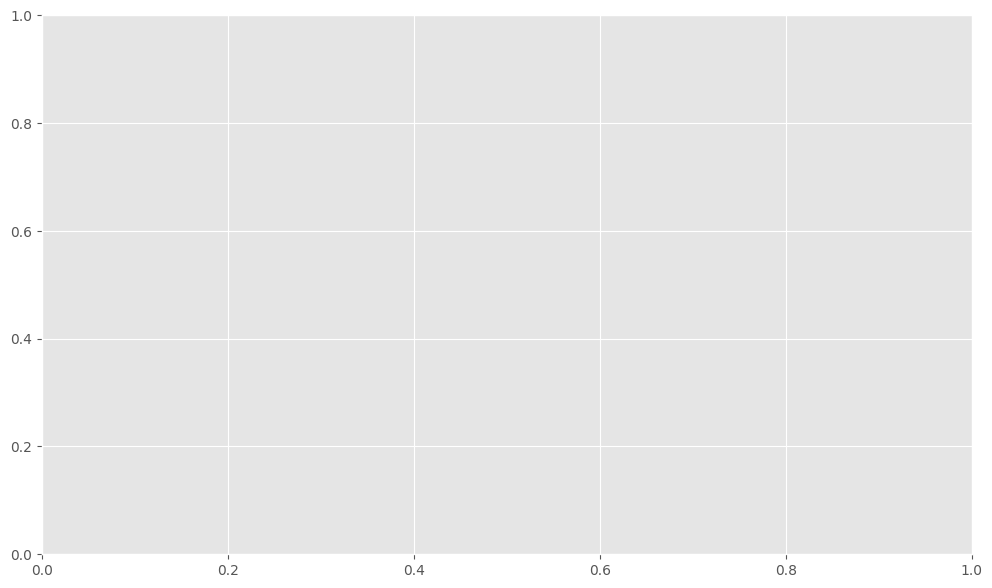

In [30]:
import matplotlib.pyplot as plt

# Agregar columnas necesarias a X_test si no están
X_test_full = X.copy()
X_test_full['unit_number'] = df_train['unit_number']
X_test_full['time_in_cycles'] = df_train['time_in_cycles']

# Filtrar solo unidad 1
mask_unit1 = X_test_full['unit_number'] == 1
time_unit1 = X_test_full.loc[mask_unit1, 'time_in_cycles']
rul_real_unit1 = y_test.loc[mask_unit1]

# Diccionario con los nombres de modelo y sus predicciones
predicciones_modelos = {
#    'Linear Regression': y_pred_lr,
#    'KKN': y_pred_knn,
#    'Decision Tree Regression': y_pred_dt,
#    'Decision Tree w/Hyperparameters': y_pred_dt_opt,
#    'Random Forest': y_pred_rf,
    'Gradient Boosting': y_pred_gb,
    'XGBoost': y_pred_xgb
}

# Crear gráfico
plt.figure(figsize=(12, 7))
plt.plot(time_unit1, rul_real_unit1, label='RUL Real', linewidth=2, color='black')

# Superponer predicciones de modelos
for nombre, pred in predicciones_modelos.items():
    pred_unit1 = pred[mask_unit1]
    plt.plot(time_unit1, pred_unit1, label=nombre, linestyle='--')

plt.title('Comparación de RUL predicho vs real - Unidad 1')
plt.xlabel('Ciclos')
plt.ylabel('RUL')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
